# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

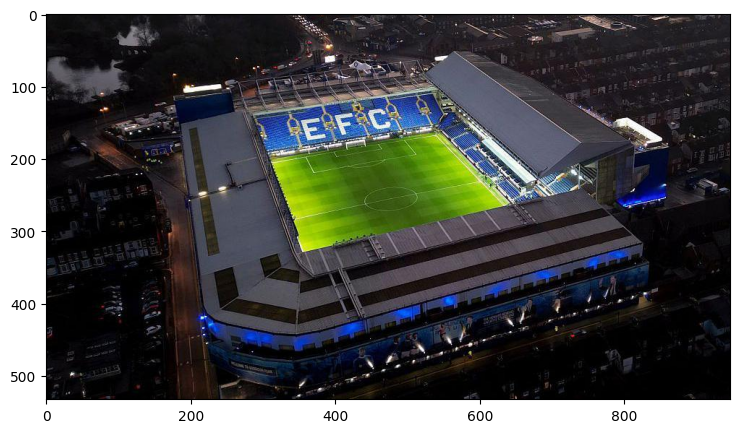

In [ ]:
img = cv2.imread('data/stadium.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x29002c789a0>)

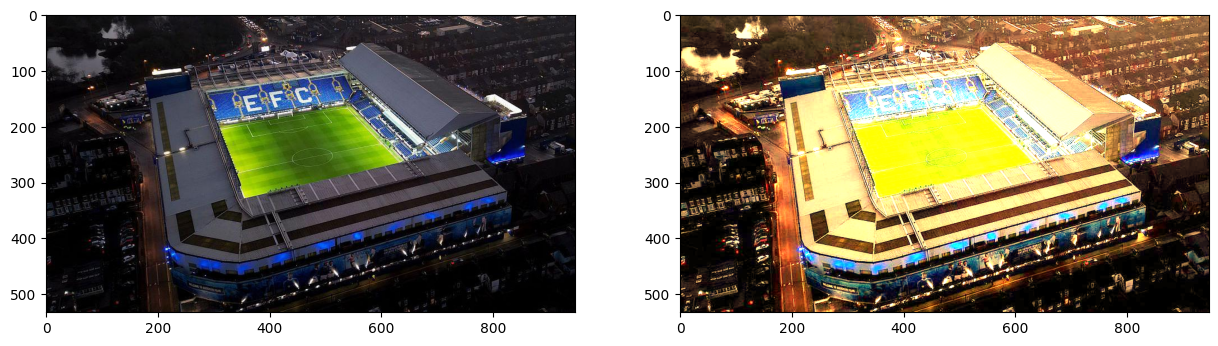

In [21]:
# Define white patch and the coefficients
row, col = 130, 410 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x29008719ed0>)

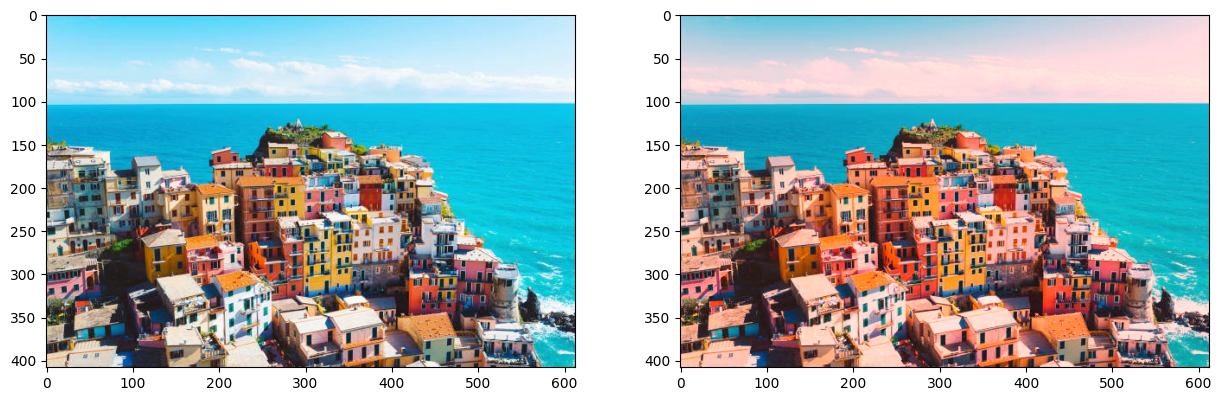

In [43]:
# Load your image
img = cv2.imread('data/city view.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(img)
# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(r)
mean_g = np.mean(g)
mean_b = np.mean(b)

mean_gray = (mean_r+mean_g+mean_b) / 3
# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
kr = mean_gray/mean_r
kg = mean_gray/mean_g
kb = mean_gray/mean_b

# Apply color balancing and generate the balanced image

r_balanced = r * kr
g_balanced = g * kg
b_balanced = b * kb

balanced = cv2.merge([r_balanced, g_balanced, b_balanced])
balanced = balanced/255
balanced[balanced>1] = 1

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x2900b188a00>)

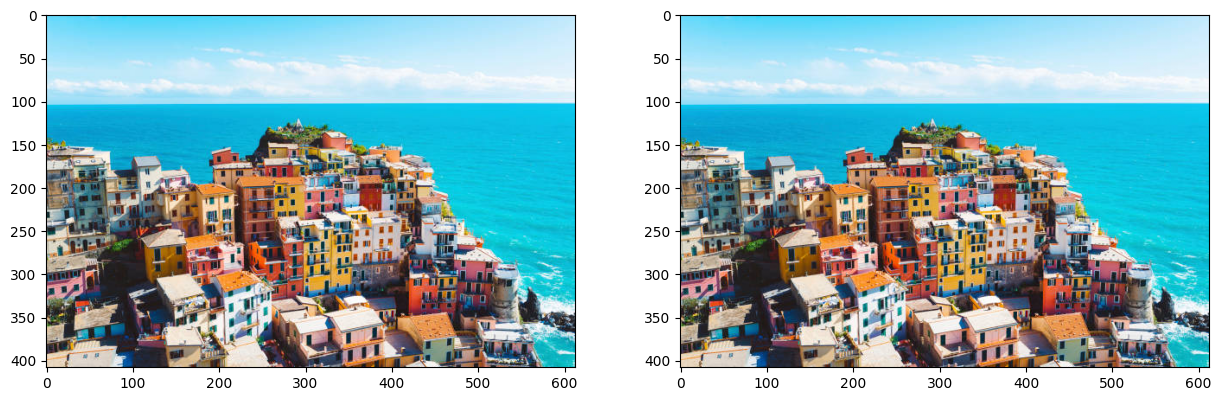

In [45]:
# Load your image
img = cv2.imread('data/city view.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(img)
# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(r)
max_g = np.max(g)
max_b = np.max(b)

kr = 255/max_r
kg = 255/max_g
kb = 255/max_b

# Apply scale-by-max balancing and generate the balanced image
balanced = cv2.merge([r*kr, g*kg, b*kb])
balanced = balanced/255
balanced[balanced>1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)